In [23]:
#!nvidia-smi

In [24]:
# For this project, we will be using the Fruits 360 dataset from Kaggle.
# We shall use Kaggle API to get the dataset from Kaggle

In [25]:
!pip install opendatasets

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [26]:
import opendatasets as od

In [27]:
od.download("https://www.kaggle.com/moltean/fruits/fruits-360_dataset/fruits-360")

Skipping, found downloaded files in "./fruits" (use force=True to force download)


In [28]:
!unzip -q "/content/FruitsData.zip"

unzip:  cannot find or open /content/FruitsData.zip, /content/FruitsData.zip.zip or /content/FruitsData.zip.ZIP.


In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2

tf.random.set_seed(4)

In [30]:
train_path = Path("fruits/fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits/fruits-360_dataset/fruits-360/Test")

In [31]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [32]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [33]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))

train_image_labels[100:110]

['Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate']

In [34]:
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:10]

array([105, 105, 105, 105, 105, 105, 105, 105, 105, 105])

In [35]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths,train_image_labels)

In [37]:
Train_paths[:10], Train_labels[:10]

(['fruits/fruits-360_dataset/fruits-360/Training/Pitahaya Red/148_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Huckleberry/165_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Tomato 2/r_249_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Banana Lady Finger/r_83_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Pear Abate/r_266_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Plum 3/245_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Cucumber Ripe 2/r_109_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Cucumber Ripe 2/260_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Nut Forest/359_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Grapefruit Pink/r_96_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..

In [38]:
# Data Augmentation

In [39]:
#Function to read image jpeg file and return Image tensor and label for the same

In [40]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [41]:
# Define Augmentation

In [42]:
IMG_SIZE = 224
BATCH_SIZE = 32

# Basic Transformation for Resize
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)                                                            
])

#Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")                                         ,
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3, -0.2))
])

In [43]:
# Load and Convert Image files to Tensors

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train=True):
  #Convert Paths and Labels to TF tensors
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  #Create dataset object for images and labels
  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  # Zip the images and labels
  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
  

  #Apply load function to all the images and labels
  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  #For Training dataset, apply Augmentation, for Validation, only Repeat

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = AUTOTUNE)
  
  dataset = dataset.repeat()

  return dataset


In [44]:
#Create Training dataset and Validate the same

%time train_dataset = get_dataset(Train_paths , Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)


CPU times: user 392 ms, sys: 23.3 ms, total: 416 ms
Wall time: 416 ms
(32, 224, 224, 3)
(32, 131)


Avocado ripe


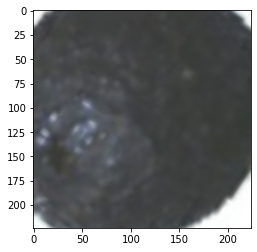

In [45]:
plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

CPU times: user 61.1 ms, sys: 0 ns, total: 61.1 ms
Wall time: 59.8 ms
(32, 224, 224, 3)
(32, 131)
Grape White 3


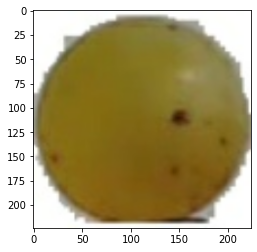

In [46]:
#Create Training dataset and Validate the same

%time val_dataset = get_dataset(Train_paths , Train_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

In [47]:
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224,224,3),
    include_top = False
)

Model_Efficient = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation = 'softmax')

])

Model_Efficient.summary()

43950080/43941136 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [48]:
Model_Efficient.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [49]:
#Compile the Model
Model_Efficient.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'Recall')]
)

In [50]:
#Train the Model

history = Model_Efficient.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 1,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

2022-04-02 13:18:43.422335: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1586/1586 [==============================] - 2255s 1s/step - loss: 0.2471 - accuracy: 0.9377 - precision: 0.9667 - Recall: 0.9176 - val_loss: 1.4693 - val_accuracy: 0.6835 - val_precision: 0.7351 - val_Recall: 0.6496


In [51]:
#Turn off the backbone network(EfficientNet)
Model_Efficient.layers[0].trainable = False

In [52]:
#Define Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("EfficientNet Best Weights.h5", verbose = 1, save_best_only = True, save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [53]:
#Train the Model without the backbone layer

#Train the Model

history = Model_Efficient.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9817 - precision: 0.9838 - Recall: 0.9796
Epoch 00001: val_loss improved from inf to 0.40614, saving model to EfficientNet Best Weights.h5
1586/1586 [==============================] - 2206s 1s/step - loss: 0.0644 - accuracy: 0.9817 - precision: 0.9838 - Recall: 0.9796 - val_loss: 0.4061 - val_accuracy: 0.8989 - val_precision: 0.9184 - val_Recall: 0.8808
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9882 - precision: 0.9896 - Recall: 0.9870
Epoch 00002: val_loss did not improve from 0.40614
1586/1586 [==============================] - 2213s 1s/step - loss: 0.0426 - accuracy: 0.9882 - precision: 0.9896 - Recall: 0.9870 - val_loss: 1.8112 - val_accuracy: 0.6492 - val_precision: 0.6816 - val_Recall: 0.6270
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9906 - precision: 0.9915 - Recall: 0.9901
Epoch 00003: val

In [57]:
!mkdir -p saved_model
Model_Efficient.save('saved_model/Model_Efficient')

2022-04-02 17:01:50.811374: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/Model_Efficient/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [59]:
ls saved_model/Model_Efficient

assets/  keras_metadata.pb  saved_model.pb  variables/
